# Introduction to Jupyter notebooks
This workshop uses Jupyter notebooks. This is a convenient way to combined text and images with code. You'll find Python code examples embedded in the text tutorial. You can run these examples by clicking the run (play) button. The code can also be edited and ran again so that you can see the consequences of changes to the code. To start again from the beginning you can reset the entire notebook by choosing `Kernel` from the top menu, then `Restart & clear output`.

When you first open a Jupyter notebook the working directory is set to the directory containing the Jupyter notebook. For most of the exercises in this tutorial we'll want the working directory to be set to the root FluxEngine directory, which is one directory up. Set the working directory by running the code below (don't worry if you don't understand it, the important thing is that you run it at the start):

In [1]:
#This code changes the working directory from the tutorial folder to the root FluxEngine folder.
import os
if os.path.basename(os.getcwd()) != "FluxEngine":
    os.chdir(os.path.join("..",".."))
print "Working directory is now:", os.getcwd()


Working directory is now: /home/rr/Files/fluxengine_v3/FluxEngine


# Getting setup with FluxEngine
Hopefully you have already downloaded and installed FluxEngine prior to this workshop. It you haven't you should do this now. To download the latest version go to the git hub repository [here](https://github.com/oceanflux-ghg/FluxEngine/).

FluxEngine uses several third party libraries and tools. A script is included in the download to automatically install these dependencies for MacOS and Linux, and installation instructions are included for Windows in section 3 of [the instructions](https://github.com/oceanflux-ghg/FluxEngine/blob/master/FluxEngineV3_instructions.pdf). If you haven't done this already you should do this now.

**TODO: provide description to run installer for mac/linux. Discuss installation of anaconda**
**TODO: seperate reset working directory functions? Use a library to manage these?**
**TODO: Box explaining the difference between python, commandline and ipython commands? Describe what the commandline is and how to run a commandline command in Windows/Mac**



# Verifying FluxEngine has been installed correctly
It is important to verify that FluxEngine, and its dependencies, have been installed correctly. This will prevent problems arising later, and gives us confidence that the flux calculation is being performed correctly by running a known scenario and comparing it to previously published data. This is all handled automatically using a verification script. If you have already ran the verification script when you first installed FluxEngine you do not have to do this again. If you haven't already, then do this by running the code below. It will take about ten minutes to run, but you can continue with the rest of the tutorial while you wait, remembering to check back to make sure you got a message saying "Validation successful! All values are within threshold limits" when it has finished.

In [1]:
#Run the verification script.
!python verify_socatv4_sst_salinity_gradients_N00.py #Run the verification script

/home/rr/Files/Tasks/20190408_SummerSchool/FluxEngine
Running FluxEngine for year 2010...
Executing on 'rr-HP-Compaq-Elite-8300-MT' at 20/05/2019 11:17:24
Parsing settings file at: /home/rr/Files/Tasks/20190408_SummerSchool/FluxEngine/fluxengine_src/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (180, 360)
Preprocessing rain: Flipping longitude orientation.
Preprocessing rain: Flipping latitude orientation.
Assuming correct orientation for pco2_sw. Variable has not been flipped.
Preprocessing pco2_sw: Flipping longitude orientation.
Assuming correct orientation for vco2_air. Variable has not been flipped.
Preprocessing vco2_air: Flipping longitude orientation.
Assuming correct orientation for salinity. Variable has not been flipped.
Converting pressure from Pa to mbar
Assuming correct orientation for pco2_sst. Variable has not been flipped.
Preprocessing pco2_sst: Flipping longitude orientation.
Converting pco2_sst from kelvin to celsius.
(ofl

(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (180, 360)
Preprocessing rain: Flipping longitude orientation.
Preprocessing rain: Flipping latitude orientation.
Assuming correct orientation for pco2_sw. Variable has not been flipped.
Preprocessing pco2_sw: Flipping longitude orientation.
Assuming correct orientation for vco2_air. Variable has not been flipped.
Preprocessing vco2_air: Flipping longitude orientation.
Assuming correct orientation for salinity. Variable has not been flipped.
Converting pressure from Pa to mbar
Assuming correct orientation for pco2_sst. Variable has not been flipped.
Preprocessing pco2_sst: Flipping longitude orientation.
Converting pco2_sst from kelvin to celsius.
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0 for flux calculation (ignoring 

(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (180, 360)
Preprocessing rain: Flipping longitude orientation.
Preprocessing rain: Flipping latitude orientation.
Assuming correct orientation for pco2_sw. Variable has not been flipped.
Preprocessing pco2_sw: Flipping longitude orientation.
Assuming correct orientation for vco2_air. Variable has not been flipped.
Preprocessing vco2_air: Flipping longitude orientation.
Assuming correct orientation for salinity. Variable has not been flipped.
Converting pressure from Pa to mbar
Assuming correct orientation for pco2_sst. Variable has not been flipped.
Preprocessing pco2_sst: Flipping longitude orientation.
Converting pco2_sst from kelvin to celsius.
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0 for flux calculation (ignoring 

# Creating a custom configuration file
For the remainder of this tutorial we will create a new run configuration, based on the verification run but with a number of changes, and then visualise the output. To do this, you'll first need to understand FluxEngine configuration files.

Lets have a look at the configuration file used to run the above verification. FluxEngine uses plain text configuration files to specify input data and to select various options to change how the flux calculation is performed. We'll be using this configuration as the basis for our new FluxEngine run, but it's important not to modify the original or future verification runs may not work. To make a copy of the file run the following:

In [4]:
import os.path as path;
import shutil;
shutil.copy(path.join("configs", "socatv4_sst_salinity_gradients-N00.conf"), path.join("Tutorials", "01_introduction", "custom_config.conf"));

## Understanding configuration files
We now have made a new configuration file based on the verification run, lets open it. You can find it here `FluxEngine/Tutorials/01_introduction/custom_config.conf`. Use a text editor such as Notepad++ to open this file and view its contents.

<div class="alert alert-block alert-warning">
<b>Note - Opening config files: </b> Configuration files are in plain text format and can be opened in software such as Notepad, Notepad++ or TextEdit. You should not use Microsoft Word or other word processing software to edit configuration files because they can add invisible formatting characters to files which can prevent the FluxEngine interpretting the file correctly. On some older Windows systems configuration files may display all on one line. The easiest way to avoid this is by installing Notepad++ (a free lightweight text editor), and using this to edit configuration files.
</div>

Configuration files contain a list of options/setting names and values following the format of `option = value`. The order in which options are defined does not matter, but it is often useful to group related options together. Any text preceeded by a `#` symbol is a comment. Comments provide helpful information about what a particular setting, or group of settings, do. It isn't necessary to understand all of the settings at this point, but see if you can identify where the following settings are defined by reading the comments:
 - Where is input data specified? What types of input data are supplied (e.g. salinity data)?
 - Where is the flux calculation selected? Which flux equation (e.g. the 'rapid' or 'bulk') does the verification run use?
 - Where is gas transfer velocity parameterisation specified?
 - Where is the output directory is set? Optional: Locate the output directory and open some one of the files (see the information box below for help).

If you want to find out more information about a particular setting you can look the description in [the instructions](https://github.com/oceanflux-ghg/FluxEngine/blob/master/FluxEngineV3_instructions.pdf), (see section 7.2).

<div class="alert alert-block alert-info">
<b>Extra info - Opening netCDF files:</b> The easiest way to open netCDF files is to use a program such as Panoply. You can download Panoply for Mac, Windows or Linux [here](https://www.giss.nasa.gov/tools/panoply/). Alternatively, you can use a programming language such as Python, R or Matlab to read netCDF files and plot them. This is beyond the scope of these tutorials, and it is recommended that you use Panoply for now, unless you already have experience reading and plotting netCDF files.
</div> 

## Modifying the config file

### Specifying input data
Each input dataset is described as a data layer, within FluxEngine. These are supplied as netCDF (.nc) files which contain metadata about the data (description, units, expected range, etc.) as well as data about the dimensions (spatial and temporal coordinates). An input data layer is defined by a file path and a 'product' name:

```
windu10_path = data/validation_data/globwave/<YYYY>/<YYYY><MM>_OCF-WSP-GLO-1M-100-MGD-GW-v2.nc
windu10_prod = wind_speed_cor_mean
```

Here we're defining the file path to our wind speed netCDF file using `windu10_path`, and the product name (which is the name of the variable inside the netCDF file) using `windu10_prod`. Notice that tokens are used to represent the year and month (`<YYYY>` and `<MM>`). These are substituded for the numerical representation of the current year and month when FluxEngine runs, allowing different input files to be selected for different time steps.

We will use an updated salinity dataset from the World Ocean Atlas (WOA) for our custom flux calculation. Find the section of the configuration file which defines the salinity input and modify them to look like this:

```
salinity_path = data/tutorial_data/WOA_salinity/surface_woa18_A5B7_s<MM>_01.nc
salinity_prod = salinity_mean
```

Notice that if you open one of the WOA salinity data netCDF files using Panoply there are three variables, `lon`, `lat` and `mean_salinity`. The first two define the lon-lat grid and the last contains the mean monthly sea surface salinity. We want the sea surface salinity, which is why we set `salinity_prod = salinity_mean`.

<div class="alert alert-block alert-info">
<b>Extra info:</b> There is a general pattern to specifying data layers which is `datalayername_suffix`. You've already seen the use of the `_path` and `_prod` suffix to define file paths and product names, but others can be used to define, for example, minimum and maximum allowed bounds for the input data, or to perform preprocessing such as unit conversions. [The instructions](https://github.com/oceanflux-ghg/FluxEngine/blob/master/FluxEngineV3_instructions.pdf) (section 7.6.1) provides more information on using different suffixes to change the way input data layers are handled.
</div>


### Selecting a gas transfer velocity parameterisation
We'll use a more recent wind-based gas transfer velocity parameterisation too. Find the line that starts `k_parameterisation`. It's currently set to use the parameterisation described in Nightingale et al., Global Biogeochemical Cycles, 2000. There are a number of different gas transfer velocity parameterisations built in to FluxEngine, and users can add custom one. We'll stick to using a build-in parameterisation for now (many of these are listed in the comments of the configuration file. Set `k_parameterisation = k_Wanninkhof2014`, which tell FluxEngine to use the updated parameterisation described by Wanninkhof, Limnology and Oceanography: Methods, 2014.

We'll also update the Schmidt number parameterisation to use the relationship described in the same paper. Currently the configuration file doesn't define a Schmidt number parameterisation and so it will use the default version which is outdated. Add a new line to the configuration file that reads `schmidt_parameterisation = schmidt_Wanninkhof2014`. Now our gas transfer parameterisation and Schmidt number calculation will be consistent. Note that it doesn't matter where you add this line, but it might help you find it again if you add it near the k parameterisation line.

### Setting the output directory
Finally we need to change the output directory, otherwise we will overwrite the output produced by the verification run. Set the `output_dir` setting in the configuration file to `output/tutorial_output_introduction`.

By default, FluxEngine will sort output files into subdirectories based on year and month. We're only going to run our new configuration file for a single month, so we can overwrite the output directory structure by adding the following line:

`output_structure =`

Note that we are purposefully leaving the value empty, telling FluxEngine to use the root output directory (i.e. the one defined in `output_dir`).

Make sure you save the configuration file.

## Running FluxEngine with our custom configuration
Now all that's left to do is to run FluxEngine with out new configuration file. There are two ways to run FluxEngine. The first is using the commandline tool and specifying a configuration file, a start date and a stop date. The second is to import FluxEngine as a Python module and write a custom script to drive it. We'll be using the simpler commandline tool approach. The commandline tool can do nearly everything the Python module can. The main advantage of using the Python module is that it allows you to run many similar flux calculations with slight changes, for example if you want to run a sensitivity analysis.

We'll use the commandline tool (which is written in Python) by running `python ofluxghg_run.py "Tutorials/01_introduction/custom_config.conf" -s "2010-01-01" -e "2010-01-31"` in your Command Prompt (windows) or Terminal (Mac/Linux) window. The first part of the command `python ofluxghg_run.py` tell your computer to use Python to run the commandline tool which will in turn setup and run FluxEngine. The next part of the command specifies the path to the configuration file to use. Next the `-s` and `-e` specify the start and end dates, which are provided in the `YYYY-MM-DD`. For more information on using the `ofluxghg_run.py` tool you can run it with the `-h` comment ('h' for help) or see [the instructions](https://github.com/oceanflux-ghg/FluxEngine/blob/master/FluxEngineV3_instructions.pdf) (section 5.1).

<div class="alert alert-block alert-info">
<b>Jupyter notebooks and the commandline:</b> Code which starts with `!` is interpretted as a commandline command, and is equivalent to entering the command (without the `!`) into your command prompt (Windows) or terminal (Mac/Linux) window.
</div>

Run the command below to perform our new flux calculation. Notice, to minimise execution time we're only calculating the fluxes for January.

In [13]:
!python ofluxghg_run.py "Tutorials/01_introduction/custom_config.conf" -s "2010-01-01" -e "2010-01-31"

Executing on 'rr-HP-Compaq-Elite-8300-MT' at 21/05/2019 14:11:53
Parsing settings file at: /home/rr/Files/fluxengine_v3/FluxEngine/fluxengine_src/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (180, 360)
Assuming correct orientation for pco2_sw. Variable has not been flipped.
Preprocessing pco2_sw: Flipping longitude orientation.
Assuming correct orientation for vco2_air. Variable has not been flipped.
Preprocessing vco2_air: Flipping longitude orientation.
Converting pressure from Pa to mbar
Assuming correct orientation for pco2_sst. Variable has not been flipped.
Preprocessing pco2_sst: Flipping longitude orientation.
Converting pco2_sst from kelvin to celsius.
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0 for flux calculation (ignoring SSTfnd data in con

## Visualising output
If all has gone well you'll see a log of the FluxEngine run and a message at the end saying 'completed successfully'. If you look at the output directory `output/tutorial_output_introduction/` you should see a file called `OceanFluxGHG-month01-jan-2010-v0.nc`. If you have Panoply installed, you can open this file directly and look at its contents.

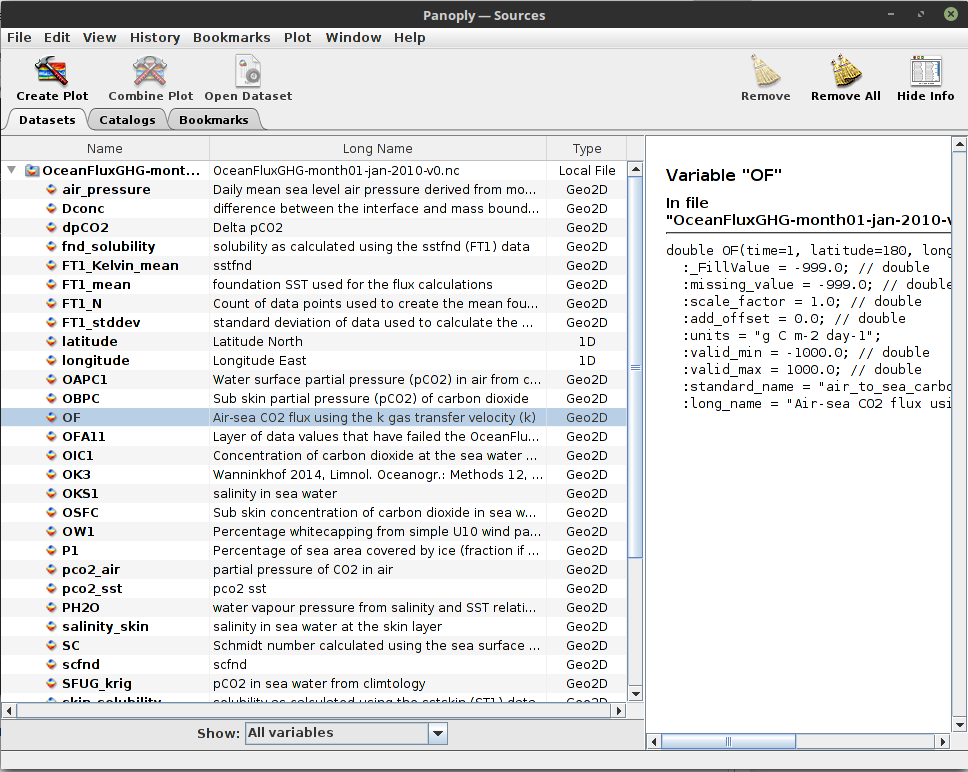

If you double click a variable name (e.g. 'OF' - the air-sea gas flux) Panoply will give you the option to plot it. Spend some time exploring the outputs FluxEngine provides. Outputs that may be of interest are the air-sea gas flux (OF), the gas transfer velocity (OK3) and the interface and aqueous gas concentrations (OIC1 and OSFC, respectively). You'll also notice that a copy of the input data sets are provided in the output file. This makes it convenient to see what values were used to make the calculation.

Plotting in Panoply is fine, but it is not very flexible (for example, what if we want to compare the calculated CO<sub>2</sub> fluxes between the verification run and our custom run). You can export data to a .csv file by right clicking on a variable and choosing one of the export options. Then you can import the data into your preferred data visualisation / analysis software and perform any operations you like. However, since we're already running a Python interpretter in this Jupyter Notebook, we might as well do this directly with Python! Lets compare the air-sea CO<sub>2</sub> fluxes between the verification and custom runs now.

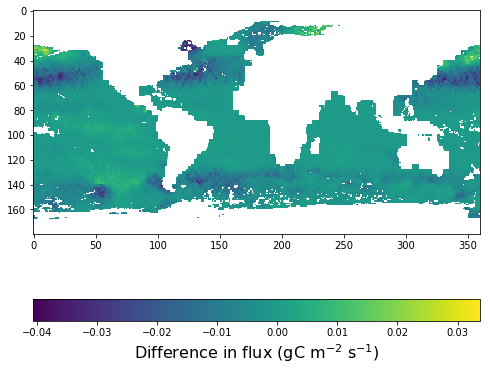

In [10]:
from netCDF4 import Dataset #allows reading of netCDF files
import matplotlib.pyplot as plt #for plotting data
import numpy as np #matrix manipulation

verificationNetCDF = Dataset("output/validate_socatv4_sst_salinity_N00/2010/01/OceanFluxGHG-month01-jan-2010-v0.nc", 'r') #Read the January data from the verification run
verificationFlux = verificationNetCDF.variables["OF"][:] #Extract the flux data from the 'OF' variable in the netCDF file

customNetCDF = Dataset("output/tutorial_output_introduction/OceanFluxGHG-month01-jan-2010-v0.nc", 'r') #Read the January data from the custom run
customFlux = customNetCDF.variables["OF"][:] #Extract the flux data from the 'OF' variable in the netCDF file

fluxDifference = customFlux - verificationFlux #Calculate the change in calculated flux
fluxDifference = np.squeeze(fluxDifference) #remove any dimensions of size 1 (in this case, the time dimension)

#plot the differences in flux
plt.figure(figsize=(8, 8))
plt.imshow(fluxDifference)
cbar = plt.colorbar(orientation="horizontal")
cbar.set_label(r"Difference in flux (gC m$^{-2}$ s$^{-1}$)", fontsize=16)


The difference biggest differences in calculated fluxes appear around regions with high wind speed (exceeding around 15 ms<sup>-1</sup>). The change in salinity data is unlikely to have a big effect, and so it seems likely that these differences are due to the updated gas transfer velocity parameterisation.

# Next tutorial
Next, we'll look at how to use FluxEngine to calculate gas fluxes using in situ data. Return to the Jupyter dashboard and open the notebook stored in [Tutorials/02_using_insitu_data/using_insitu_data.ipynb](../../Tutorials/02_using_insitu_data/using_insitu_data.ipynb).